In [11]:
from utils.graphics import *
import pandas as pd
from utils.preformatting_data import preformat
import seaborn as sns
import matplotlib.pyplot as plt



data = preformat(pd.read_csv('medics_1.csv', delimiter=',', encoding='utf-8'))

## Базовый анализ факторов возникновения ОПП у пациентов (те, которые считаются важными)

In [12]:
data.columns

Index(['развитие_опп', 'хбп', 'возраст', 'пол', 'гб', 'сахарный_диабет',
       'стенокардия', 'инфаркт_миокарда', 'мерцательная_аритмия',
       'желудочковая_экстрасистолия', 'а-в_блокада',
       'блокада_ножек_пучка_гиса', 'сад', 'дад', 'креатинин_крови', 'мочевина',
       'скф_расч', 'калий', 'натрий', 'хлориды', 'кальций', 'рн', 'ве', 'нсо3',
       'ро2', 'рсо2', 'оксигем', 'общсо2', 'гемоглобин', 'лейкоциты_крови',
       'тромбоциты', 'чсс', 'интервал_q-t', 'qrs', 'хсн', 'нк',
       'масса_миокарда_лж', 'фракция_изгнания', 'ар', 'давл_в_ла', 'уо', 'мо',
       'дд_лж_см', 'сд_лж_см', 'кдо_мл', 'ксо', 'кдр_правого_желудочка',
       'размер_левого_предсердия', 'алат', 'асат', 'холестерин',
       'триглицериды', 'лпонп', 'лпнп', 'общий_белок', 'ачтв', 'имт',
       'толщина_паренхимы_почек', 'аик', 'количество_шунтов',
       'длительность_операции', 'длительность_аик', 'время_пережатия_аорты',
       'объем_кровопотерии', 'объем_гемотрансфузии', 'объем_инфузий', 'диурез',
  

In [13]:
data.head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез,переливание_крови_и_аик,есть_хроническое_заболевание
0,0,1,67,1,1,1,1,1,0,0,...,1,150,0,0,200,830,2900,900,0,1
3,0,1,62,1,1,0,1,1,1,0,...,3,210,71,43,500,1283,1700,1700,1,1
4,1,1,55,1,1,1,1,1,0,0,...,3,265,116,74,500,1560,1800,1300,0,1
5,0,0,60,1,1,0,1,1,0,1,...,3,240,74,62,200,1350,2100,1800,0,1
8,0,1,60,1,1,0,1,0,0,0,...,3,299,122,75,500,600,1050,4000,0,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 199
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   развитие_опп                  157 non-null    int64  
 1   хбп                           157 non-null    int64  
 2   возраст                       157 non-null    int64  
 3   пол                           157 non-null    int64  
 4   гб                            157 non-null    int64  
 5   сахарный_диабет               157 non-null    int64  
 6   стенокардия                   157 non-null    int64  
 7   инфаркт_миокарда              157 non-null    int64  
 8   мерцательная_аритмия          157 non-null    int64  
 9   желудочковая_экстрасистолия   157 non-null    int64  
 10  а-в_блокада                   157 non-null    int64  
 11  блокада_ножек_пучка_гиса      157 non-null    int64  
 12  сад                           157 non-null    int64  
 13  дад       

## Построение матрицы корреляций для выявления связей и зависимостей между данными

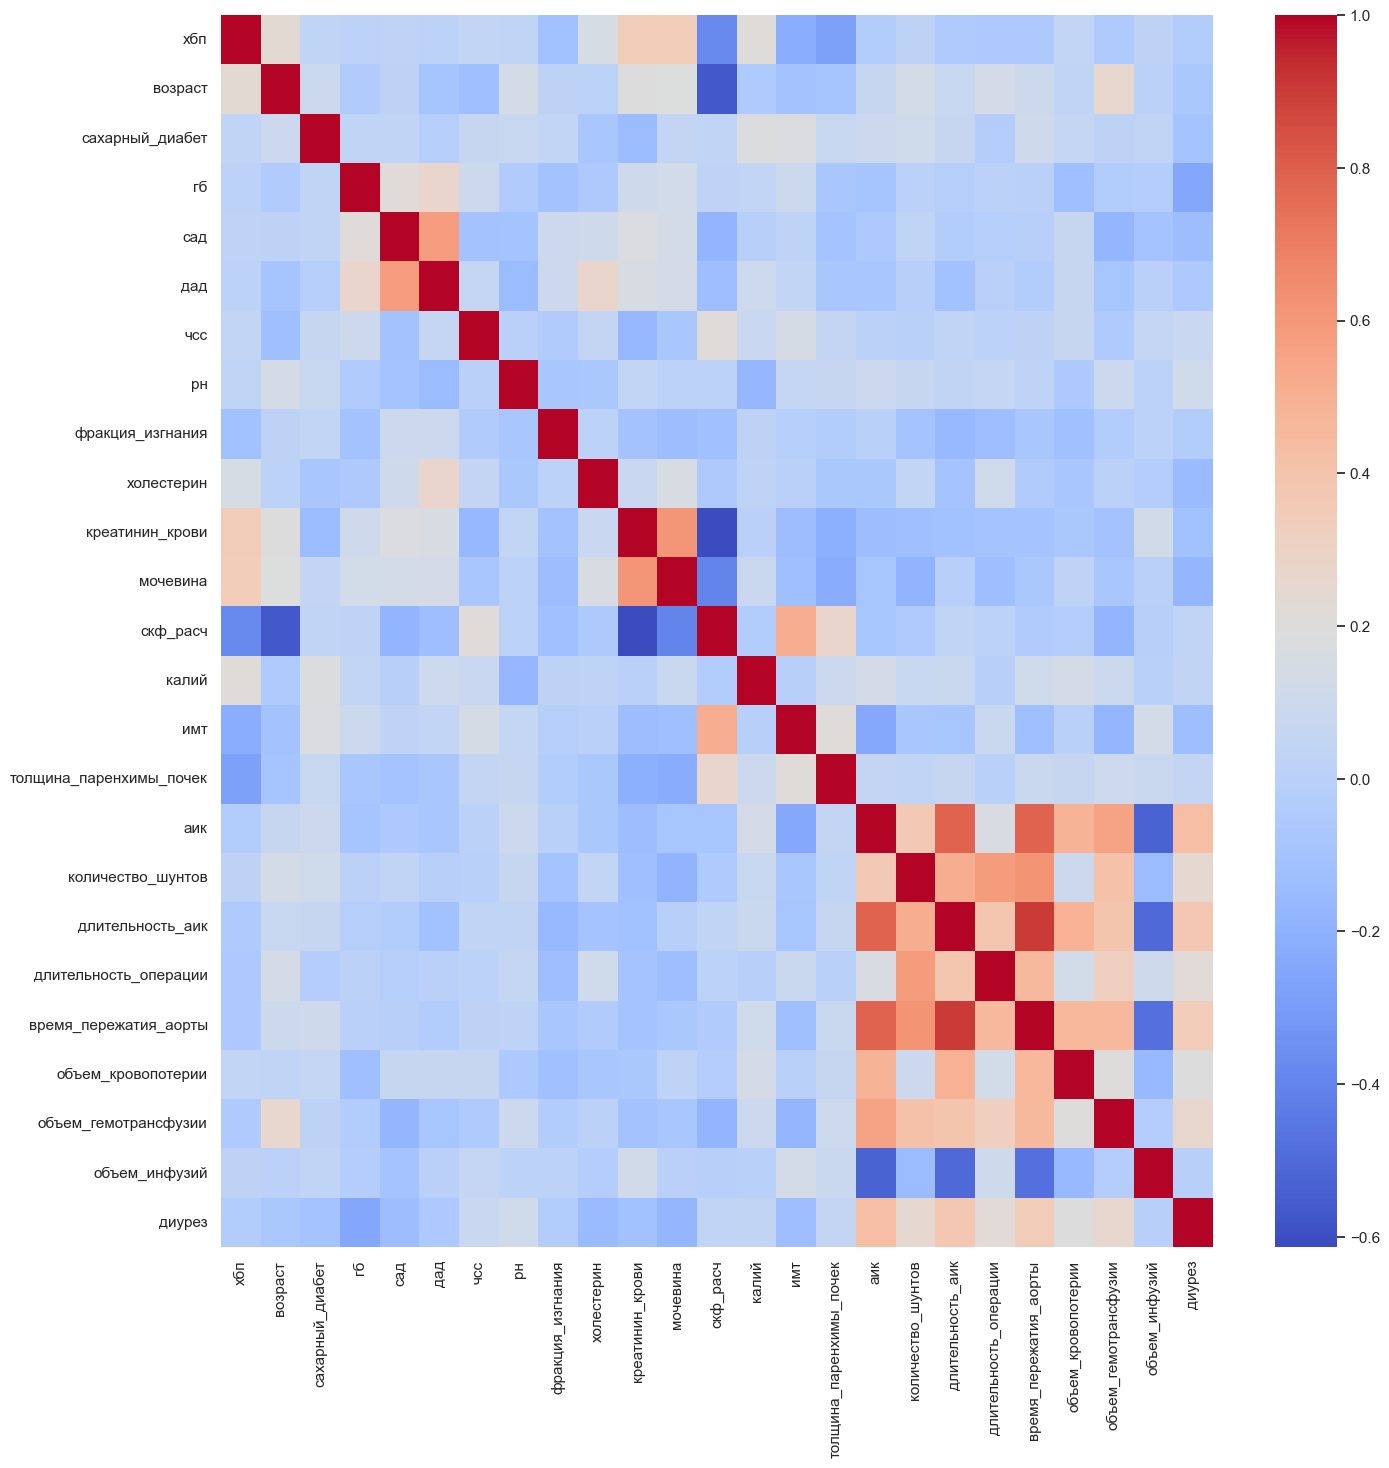

In [15]:
plt.figure(figsize=(16, 16))

sns.set(style="whitegrid")

correlation_matrix = data[
    ["хбп", "возраст", "сахарный_диабет", "гб", "сад", "дад", "чсс", "рн", "фракция_изгнания", "холестерин",
     "креатинин_крови", "мочевина", "скф_расч", "калий", "имт", "толщина_паренхимы_почек", "аик",
     "количество_шунтов", "длительность_аик", "длительность_операции", "время_пережатия_аорты",
     "объем_кровопотерии", "объем_гемотрансфузии", "объем_инфузий", "диурез"]].corr()

sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.show()

## Анализ связей

Заметно, что существует связь между следующими параметрами и хирургическими показателями:

- Калием, мочевиной и уровнем креатина в крови.
- Возрастом и объемом переливания крови во время операции.
- Оценочной скоростью клубочковой фильтрации (ОСКФ), индексом массы тела (ИМТ) и толщиной паренхимы почек.
- Артериальное давление (систолическое и диастолическое) и их взаимосвязь очевидна без дополнительных комментариев.
- Диастолическое артериальное давление (ДАД) также коррелирует с уровнем холестерина, мочевиной и креатина в крови.
- Наличие артериальной инсуффициенции клапанов (АИК) оказывает сильное влияние на большинство интраоперационных факторов, аналогично и другие сложные процессы, протекающие во время операции.


## Построение визуализации данных для факторов

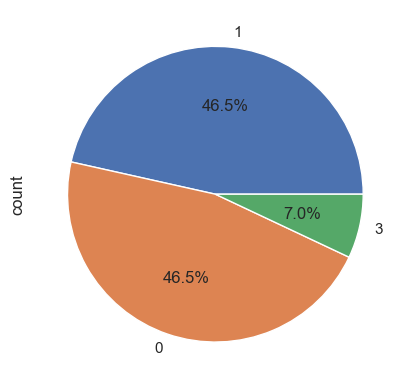

       возраст
count   157.00
mean     62.82
std       8.22
min      39.00
25%      57.00
50%      63.00
75%      68.00
max      78.00
--------------------------------------------------------------------------------------------------------------------------------


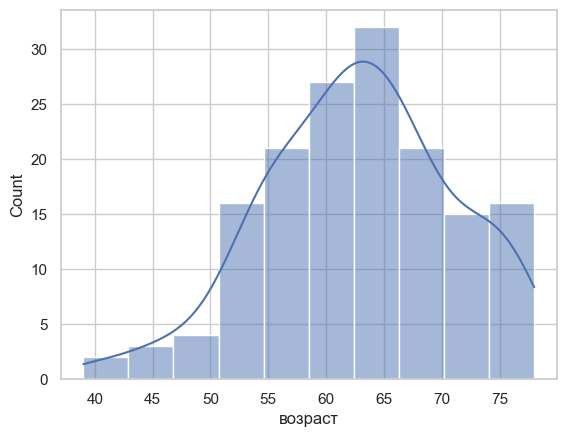

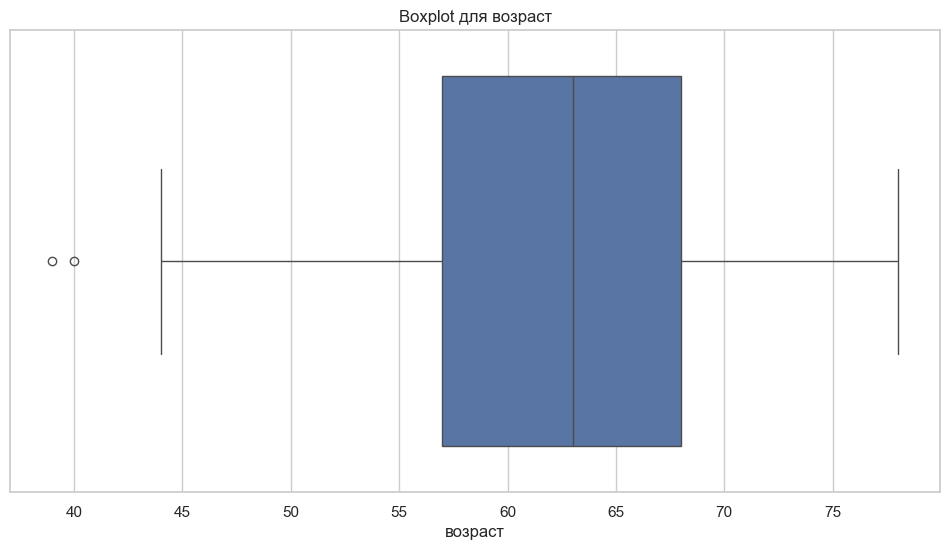

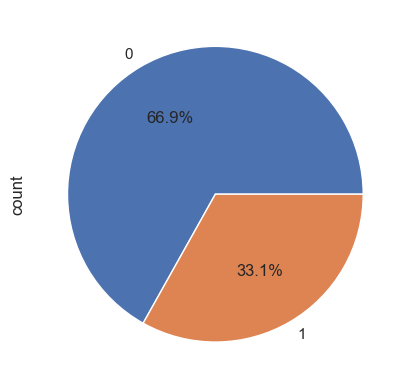

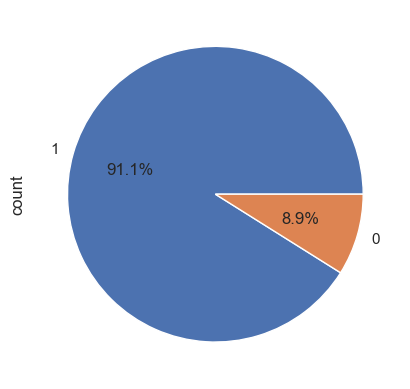

          сад
count  157.00
mean   134.15
std     12.54
min    100.00
25%    130.00
50%    130.00
75%    140.00
max    170.00
--------------------------------------------------------------------------------------------------------------------------------


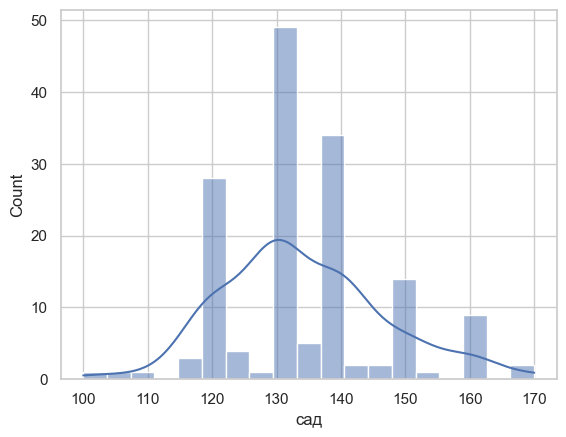

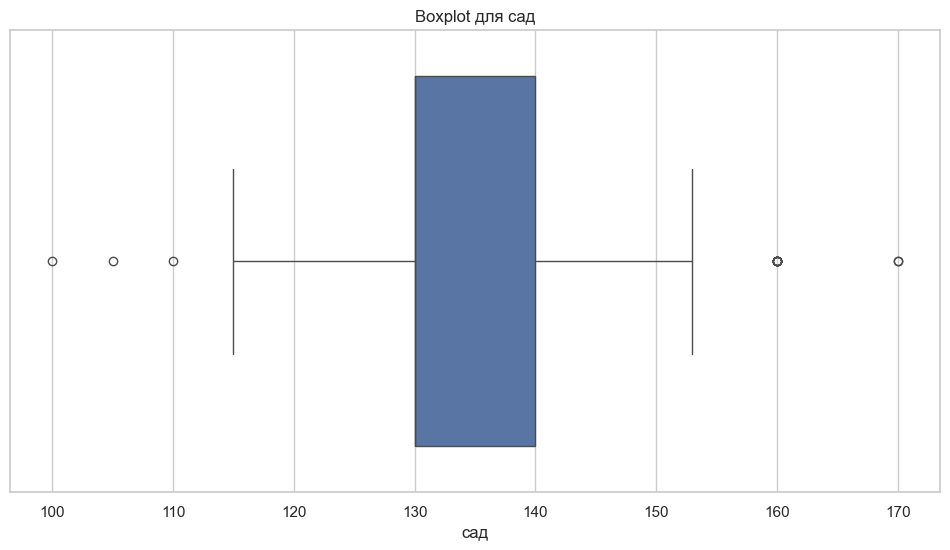

          дад
count  157.00
mean    83.72
std      7.77
min     65.00
25%     80.00
50%     80.00
75%     90.00
max    116.00
--------------------------------------------------------------------------------------------------------------------------------


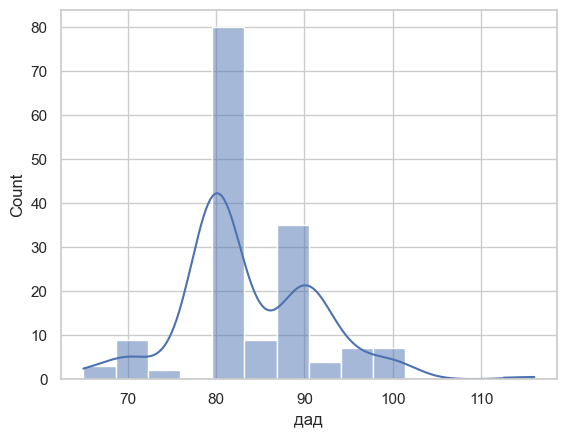

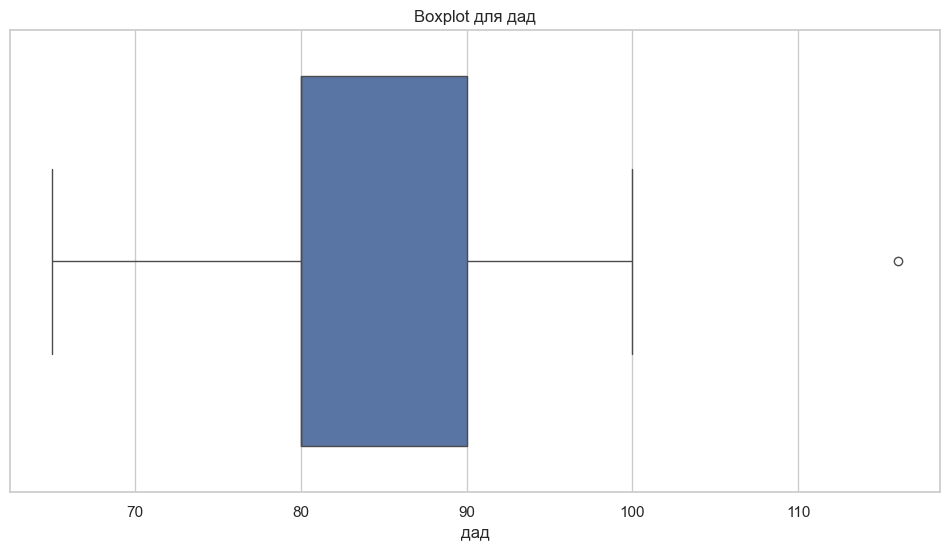

          чсс
count  157.00
mean    68.05
std     12.96
min     42.00
25%     60.00
50%     66.00
75%     76.00
max    119.00
--------------------------------------------------------------------------------------------------------------------------------


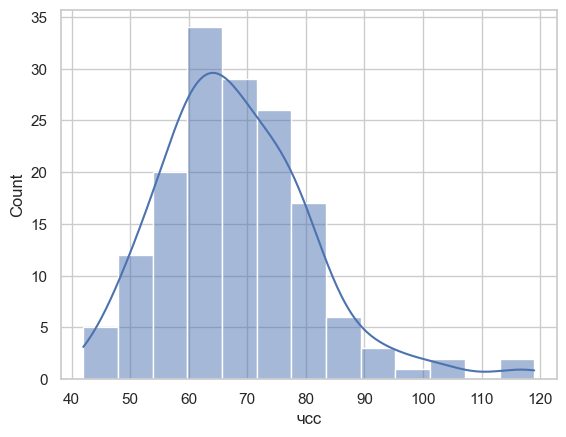

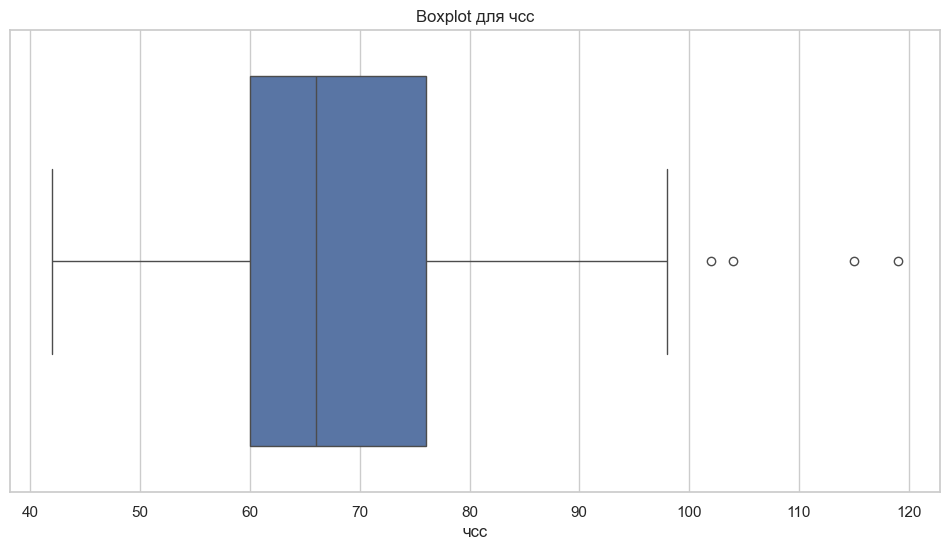

           рн
count  157.00
mean     7.37
std      0.61
min      2.00
25%      7.41
50%      7.44
75%      7.47
max      7.55
--------------------------------------------------------------------------------------------------------------------------------


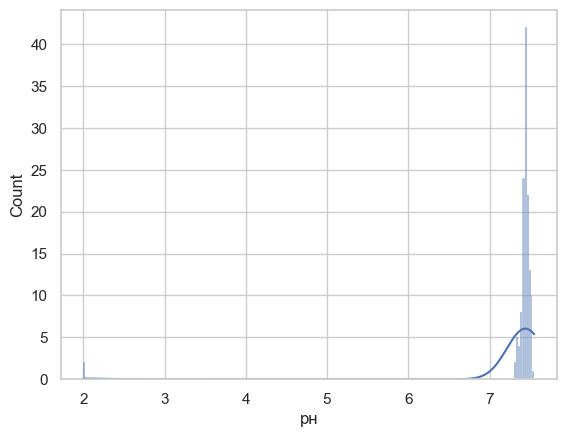

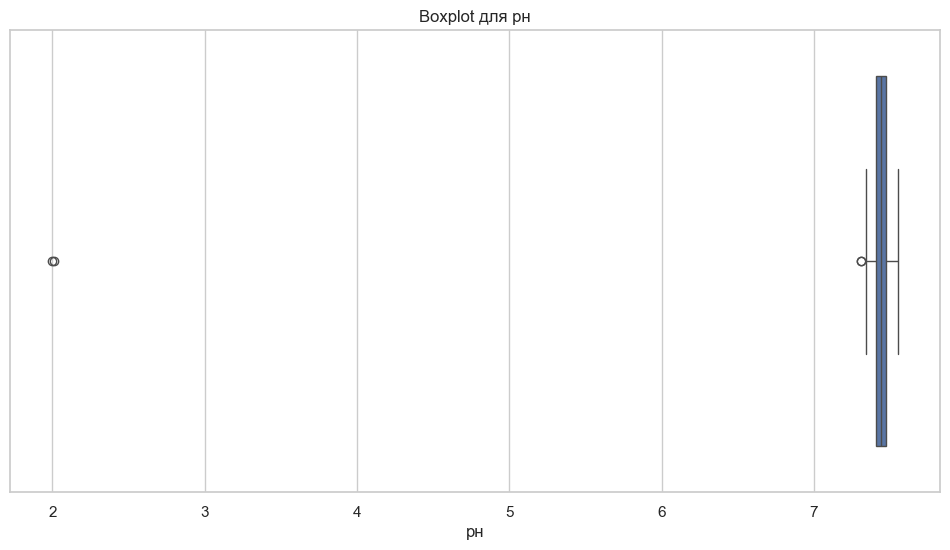

       фракция_изгнания
count            157.00
mean              60.43
std                9.32
min               34.00
25%               56.00
50%               62.00
75%               67.00
max               81.00
--------------------------------------------------------------------------------------------------------------------------------


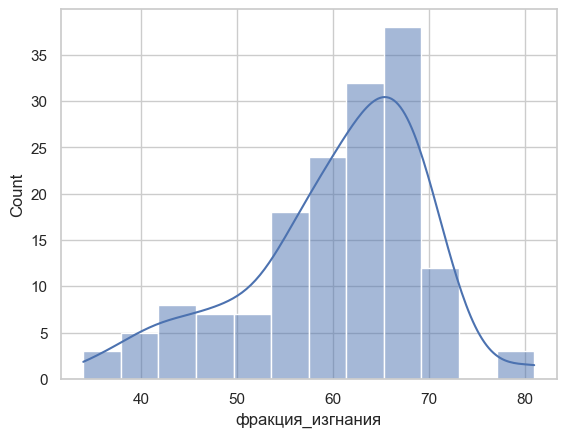

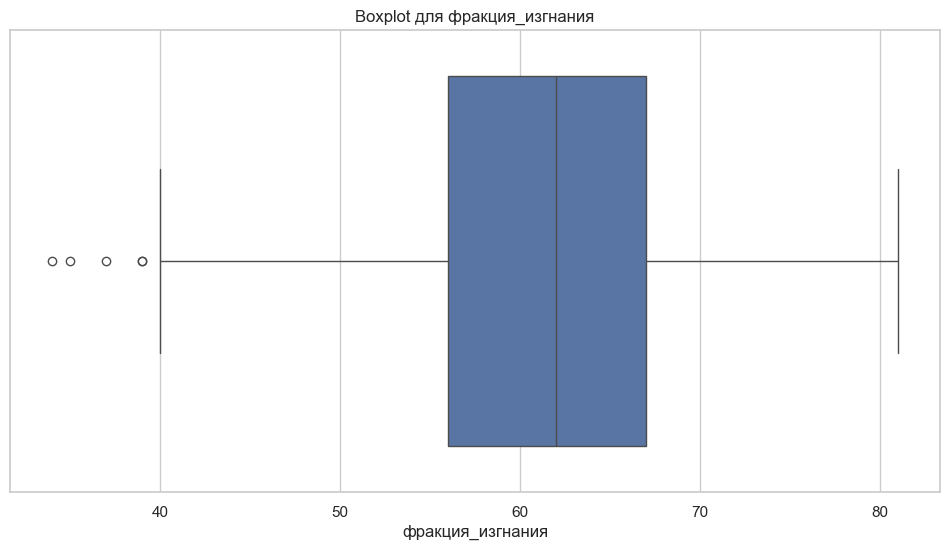

       холестерин
count      157.00
mean         4.91
std          1.14
min          2.62
25%          4.01
50%          4.85
75%          5.76
max          7.90
--------------------------------------------------------------------------------------------------------------------------------


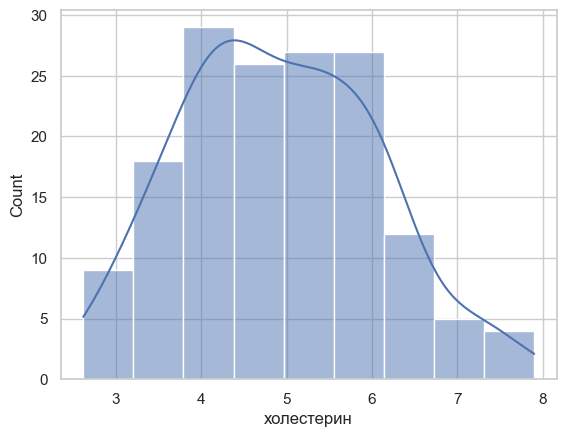

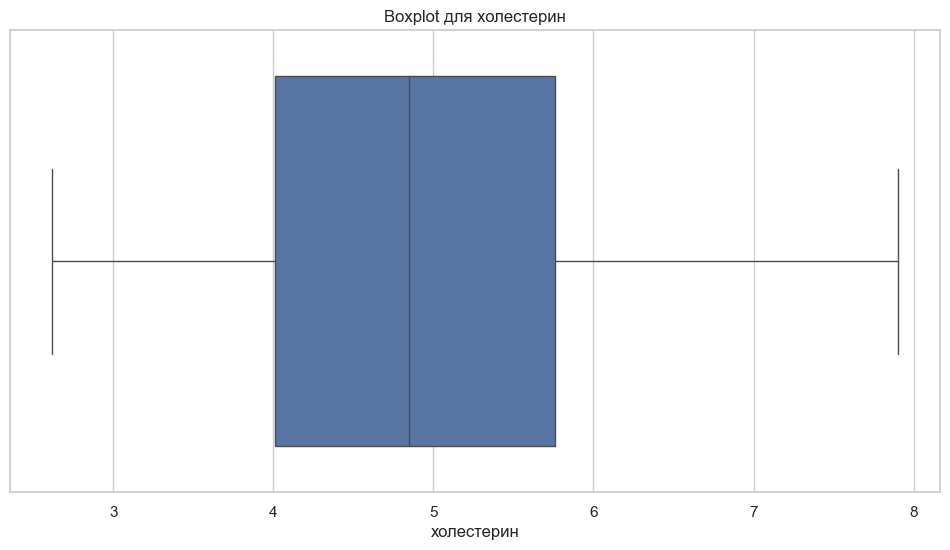

       креатинин_крови
count           157.00
mean             97.65
std              22.01
min              56.00
25%              84.00
50%              96.00
75%             106.00
max             224.00
--------------------------------------------------------------------------------------------------------------------------------


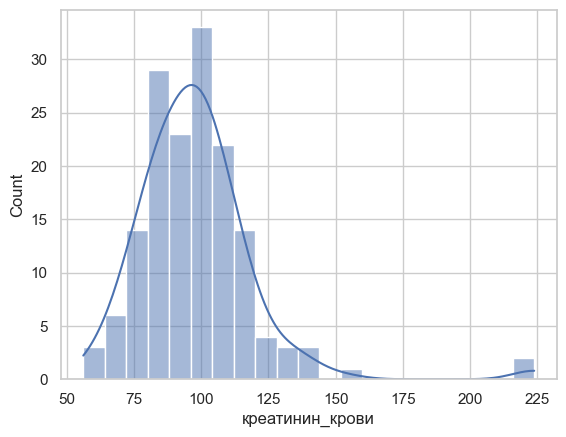

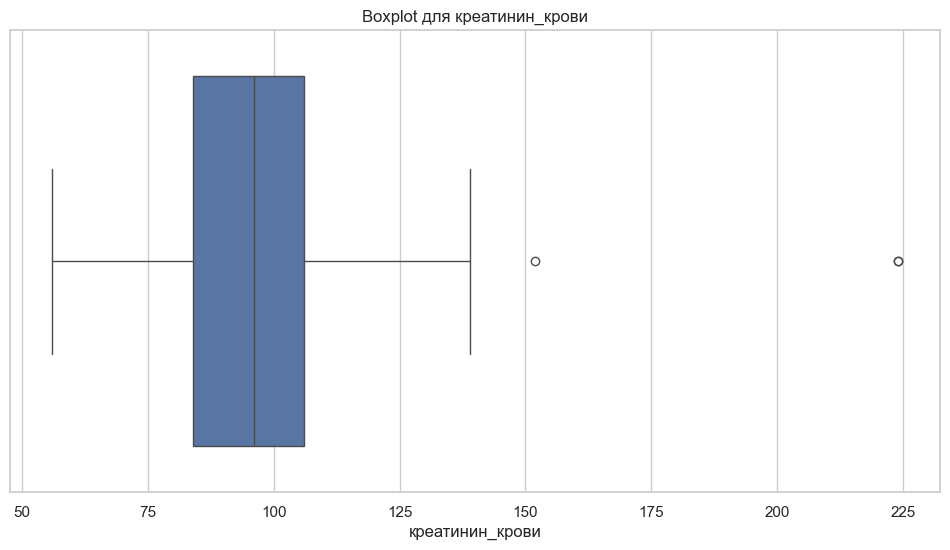

       мочевина
count    157.00
mean       6.81
std        2.12
min        3.30
25%        5.60
50%        6.50
75%        7.70
max       18.00
--------------------------------------------------------------------------------------------------------------------------------


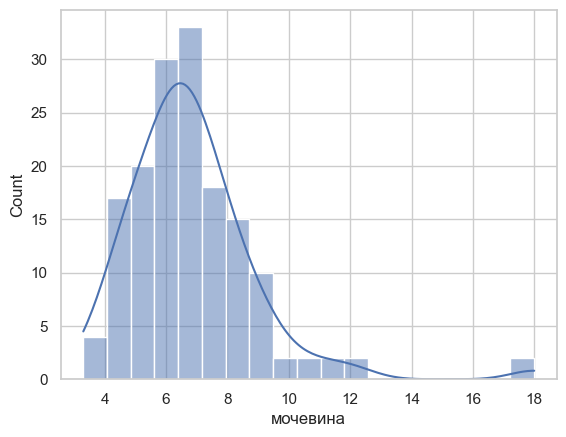

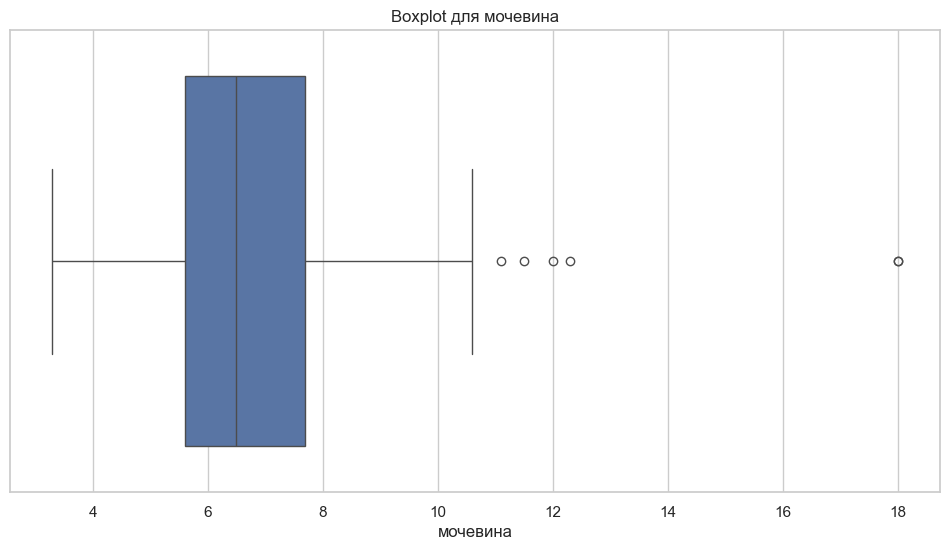

       скф_расч
count    157.00
mean      85.92
std       25.65
min       31.00
25%       68.00
50%       83.00
75%       97.00
max      172.00
--------------------------------------------------------------------------------------------------------------------------------


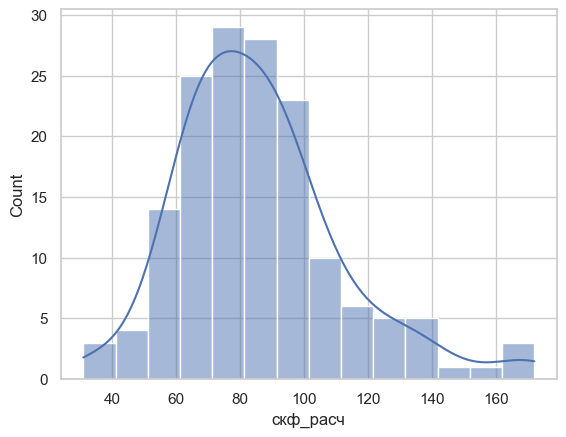

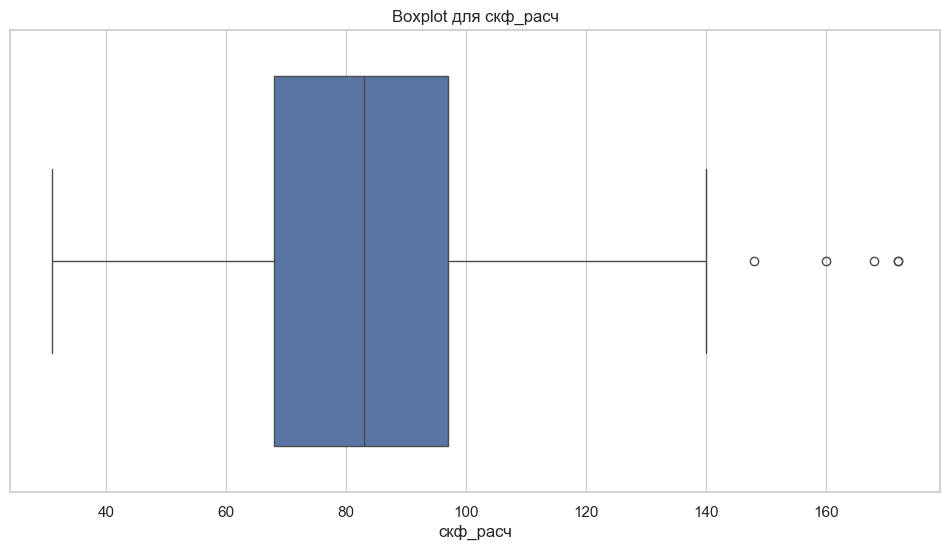

        калий
count  157.00
mean     4.43
std      0.42
min      3.27
25%      4.07
50%      4.45
75%      4.73
max      5.50
--------------------------------------------------------------------------------------------------------------------------------


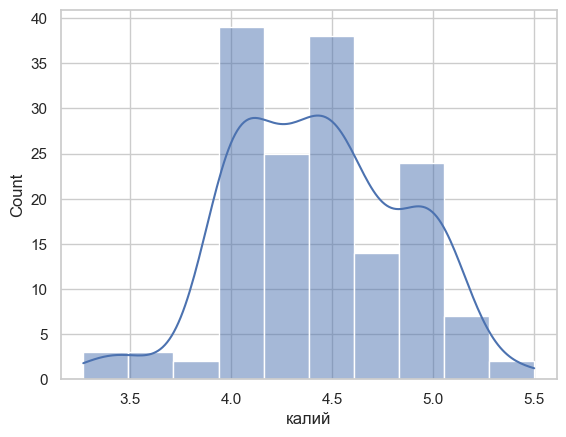

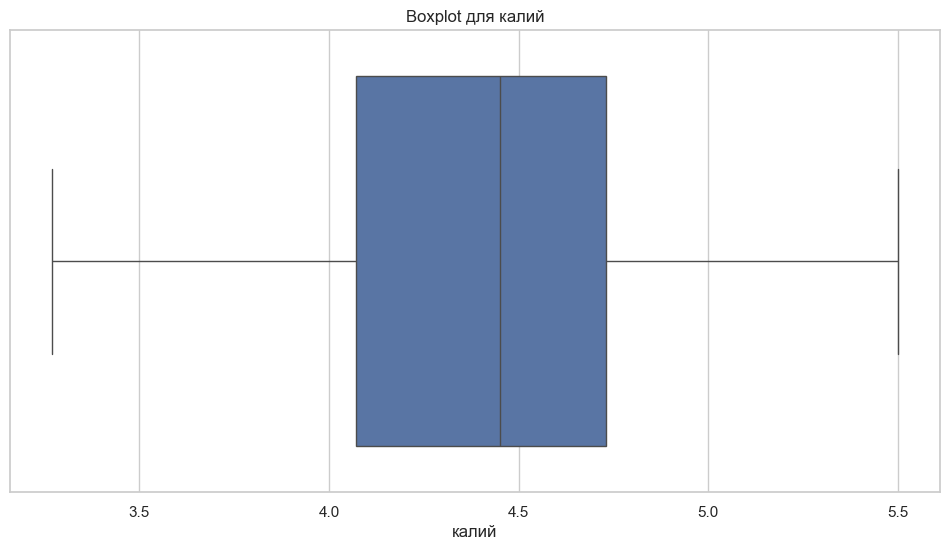

          имт
count  157.00
mean    28.71
std      3.70
min     21.00
25%     26.00
50%     28.00
75%     31.00
max     41.00
--------------------------------------------------------------------------------------------------------------------------------


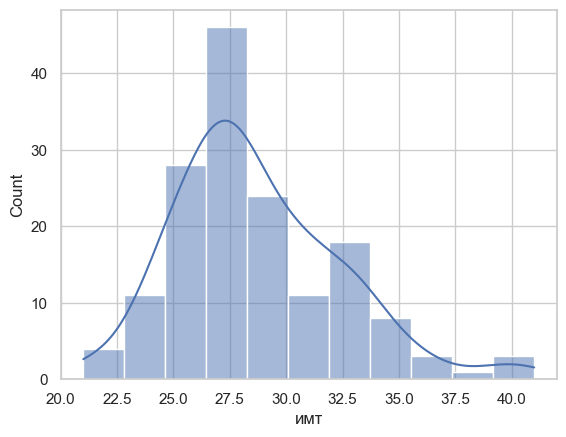

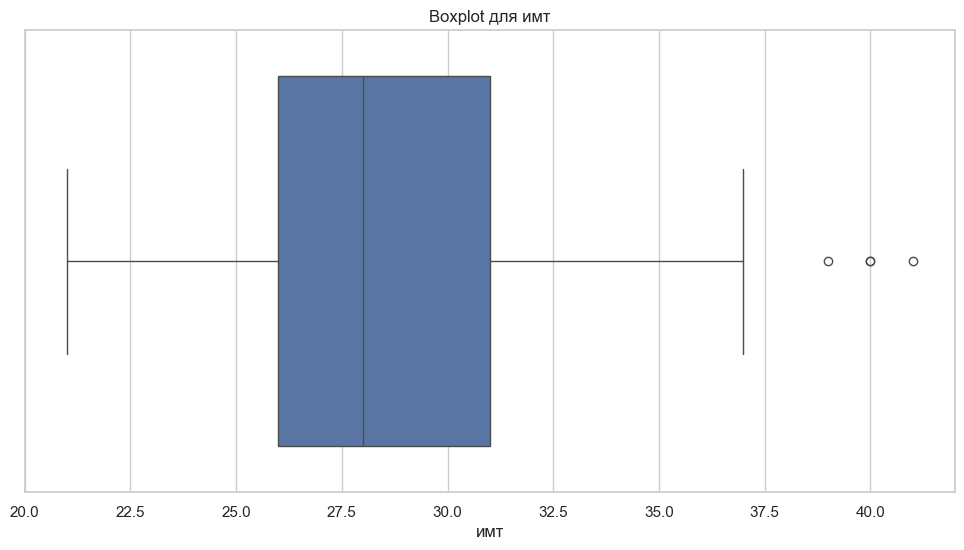

       толщина_паренхимы_почек
count                   157.00
mean                     14.91
std                       1.48
min                      11.00
25%                      14.00
50%                      15.00
75%                      16.00
max                      19.00
--------------------------------------------------------------------------------------------------------------------------------


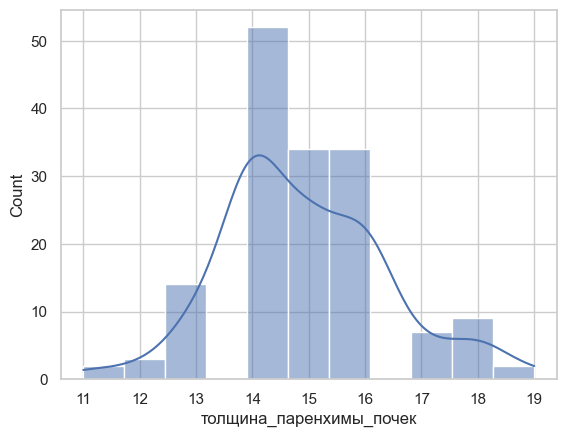

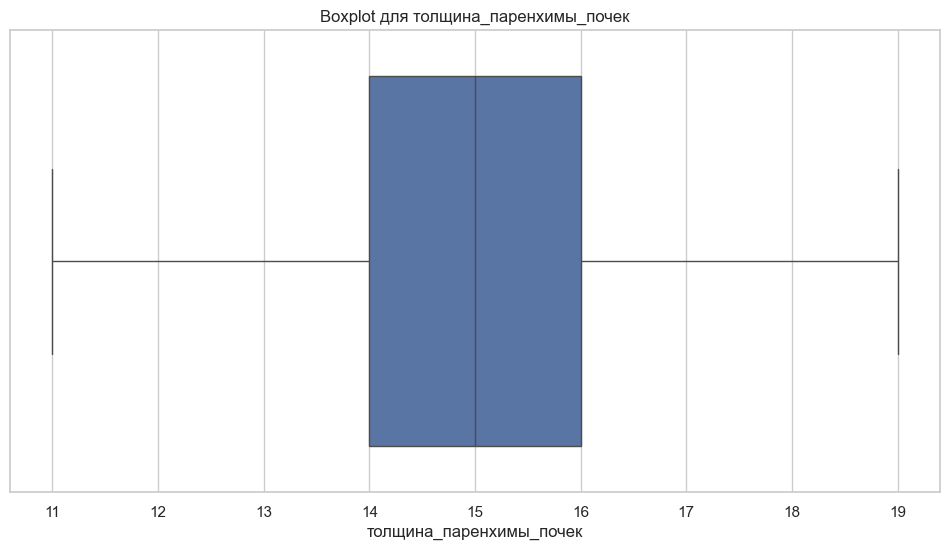

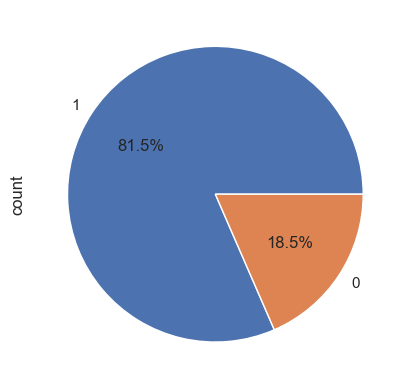

       количество_шунтов
count             157.00
mean                2.53
std                 0.87
min                 1.00
25%                 2.00
50%                 3.00
75%                 3.00
max                 4.00
--------------------------------------------------------------------------------------------------------------------------------


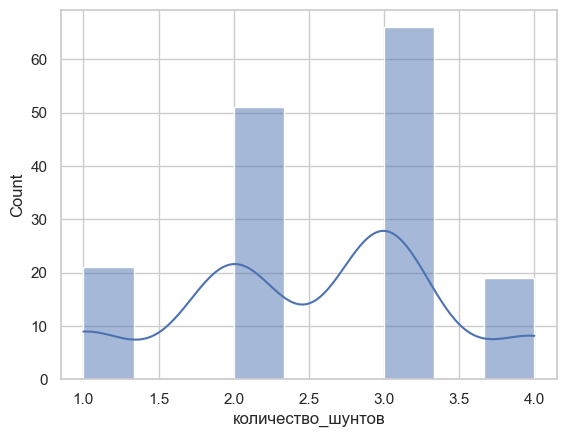

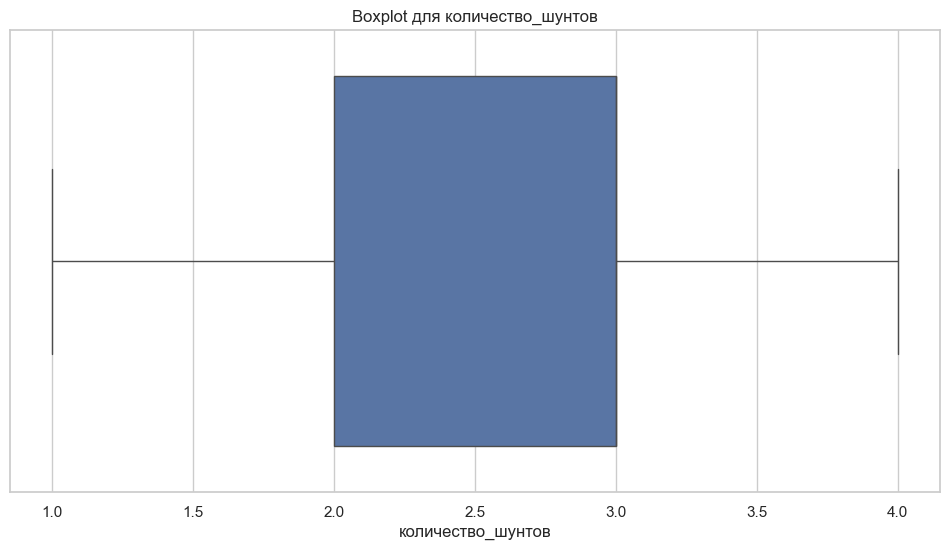

       длительность_операции
count                 157.00
mean                  242.77
std                    53.19
min                   135.00
25%                   210.00
50%                   240.00
75%                   270.00
max                   392.00
--------------------------------------------------------------------------------------------------------------------------------


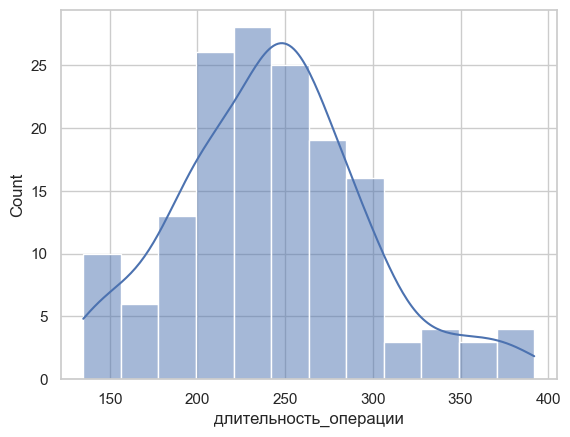

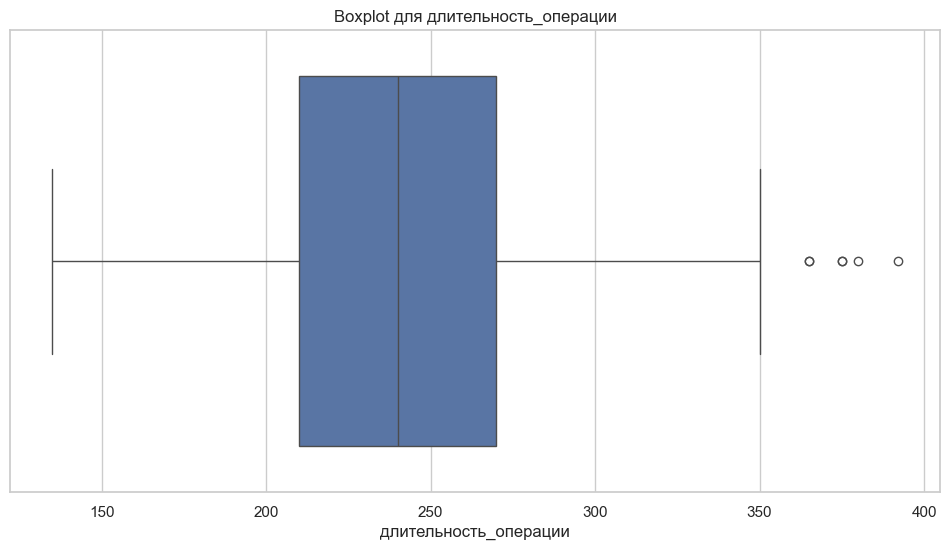

       объем_кровопотерии
count              157.00
mean               424.84
std                161.88
min                150.00
25%                250.00
50%                500.00
75%                500.00
max               1300.00
--------------------------------------------------------------------------------------------------------------------------------


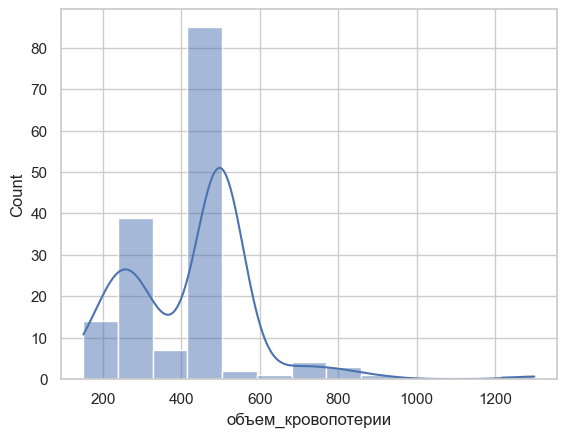

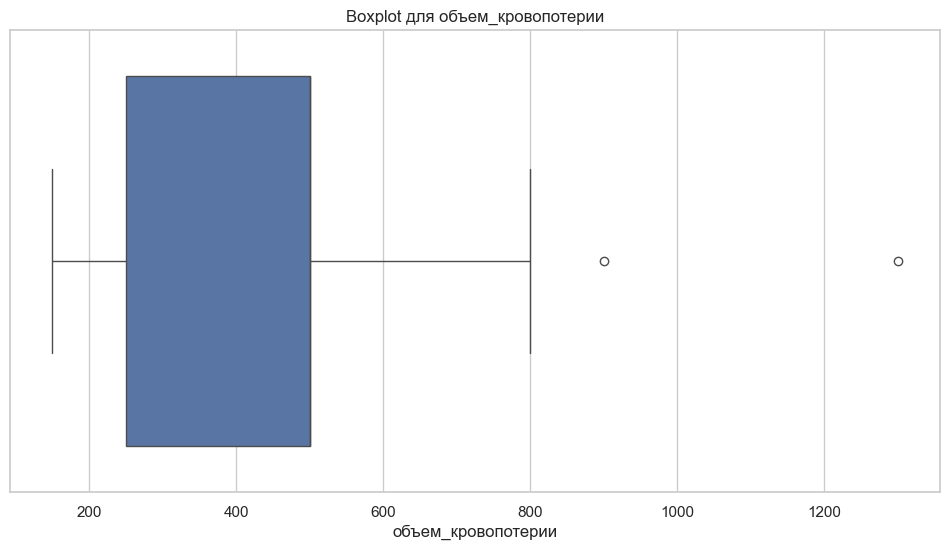

       объем_инфузий
count         157.00
mean         1385.35
std           643.69
min           400.00
25%           900.00
50%          1300.00
75%          1800.00
max          3400.00
--------------------------------------------------------------------------------------------------------------------------------


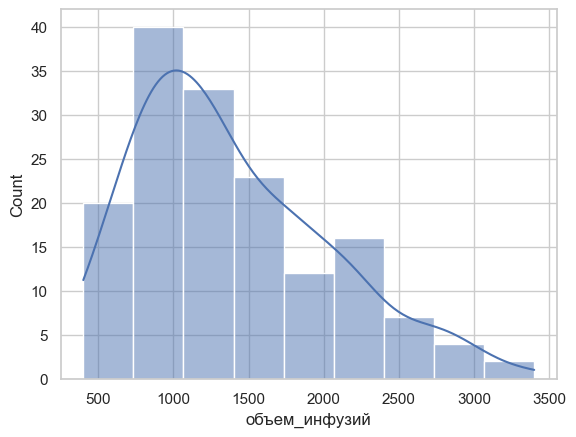

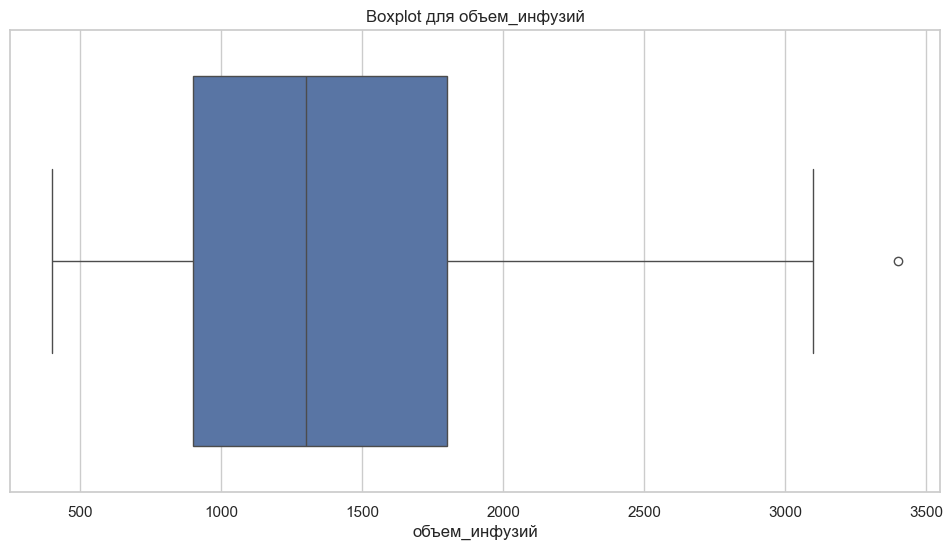

        диурез
count   157.00
mean   1688.85
std     840.97
min     300.00
25%    1000.00
50%    1600.00
75%    2000.00
max    4000.00
--------------------------------------------------------------------------------------------------------------------------------


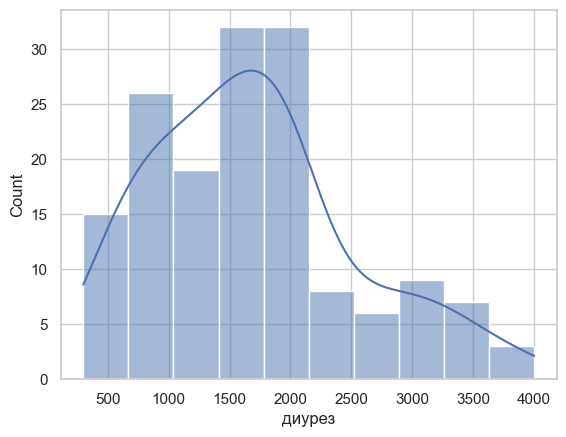

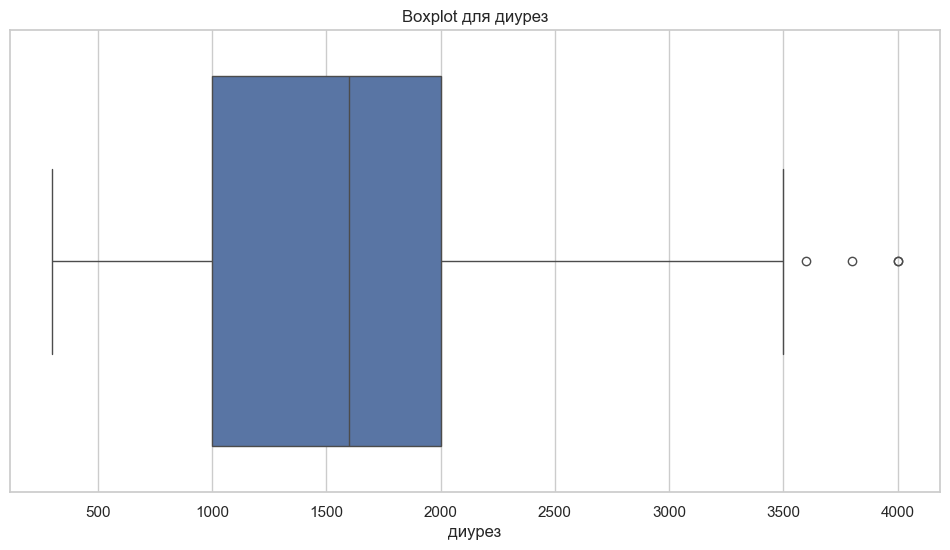

In [17]:
for factor1 in ["хбп", "возраст", "сахарный_диабет", "гб", "сад", "дад", "чсс", "рн", "фракция_изгнания", "холестерин",
                "креатинин_крови", "мочевина", "скф_расч", "калий", "имт", "толщина_паренхимы_почек", "аик",
                "количество_шунтов", "длительность_аик", "длительность_операции", "время_пережатия_аорты",
                "объем_кровопотерии", "объем_гемотрансфузии", "объем_инфузий", "диурез"]:

    # посмотрим на базовые метрики факторов
    if factor1 not in ["хбп", "сахарный_диабет", "гб", "аик", "объем_гемотрансфузии",
                       "длительность_аик", "время_пережатия_аорты"]:
        print(pd.DataFrame(round(data[factor1].describe().T, 2)))
        print('--------------------------------------------------------------------------------------------------------------------------------')
        viz_data_hist_s(data, factor1)
        viz_data_box(data, factor1)

    # визуализируем данные:
    if factor1 in ["хбп", "сахарный_диабет", "гб", "аик"]:
        viz_data_pie(data, factor1)

## Большинство ранее указанных связей, согласно визуализациям, действительно имеют место быть.